In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#the data contains details about house rents of different cities and factors such as floor, size, bathrooms,etc.
data = pd.read_csv('/content/House_Rent_Dataset.csv')

In [3]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
data_one_hot = pd.get_dummies(data)
data_one_hot = data_one_hot.astype('float32')
data_one_hot.head()

,BHK,Rent,Size,Bathroom,Posted On_2022-04-13,Posted On_2022-04-23,Posted On_2022-04-24,Posted On_2022-04-25,Posted On_2022-04-26,Posted On_2022-04-27,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2.0,10000.0,1100.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,20000.0,800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,17000.0,1000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,10000.0,800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2.0,7500.0,850.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [5]:
X = data_one_hot.drop('Rent', axis=1)
y = data_one_hot['Rent']


In [6]:
X.head()

,BHK,Size,Bathroom,Posted On_2022-04-13,Posted On_2022-04-23,Posted On_2022-04-24,Posted On_2022-04-25,Posted On_2022-04-26,Posted On_2022-04-27,Posted On_2022-04-28,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2.0,1100.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,1000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2.0,850.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [7]:
y.head()

,Rent
0,10000.0
1,20000.0
2,17000.0
3,10000.0
4,7500.0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=92)

In [9]:
#creating model

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(70, activation= 'relu'),
    tf.keras.layers.Dense(70, activation= 'relu'),
    tf.keras.layers.Dense(14, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

In [10]:
model.compile( loss = tf.keras.losses.MeanSquaredLogarithmicError(),
              optimizer = tf.keras.optimizers.Lion(
    learning_rate=0.001)
              )

In [11]:
model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 98.9553 - val_loss: 97.5252
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 98.9553 - val_loss: 97.5252
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.9553 - val_loss: 97.5252
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.9553 - val_loss: 97.5252
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 98.9553 - val_loss: 97.5252
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 98.9553 - val_loss: 97.5252
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.9553 - val_loss: 97.5252
Epoch 8/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.9553 - val_loss: 97.5252
Epoch 9/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 98.9553 - val_loss: 97.5252
Epoch 10/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 98.9553 - val_loss: 97.5252
Epoch 11/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 98.9553 - val_loss: 97.5252
Epoch 12/100
119/11

In [12]:
model.evaluate(X_test, y_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 97.9761  


97.52518463134766

In [13]:
training_results = model.fit(X_train, y_train, epochs =100, verbose = 0, validation_data=(X_test, y_test))

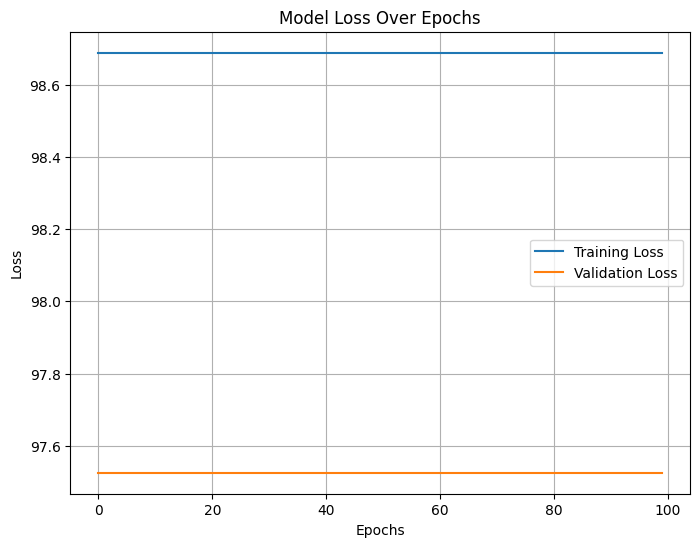

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(training_results.history['loss'], label='Training Loss')
plt.plot(training_results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()